Load full data chunkwise

In [1]:
from wikipedia_cleanup.data_processing import get_data
from wikipedia_cleanup.data_filter import generate_default_filters, KeepAttributesDataFilter, OnlyUpdatesDataFilter

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Set RAM Limit
import resource
  
def limit_memory(maxsize):
    soft, hard = resource.getrlimit(resource.RLIMIT_AS)
    resource.setrlimit(resource.RLIMIT_AS, (maxsize, hard))
limit_memory(84000000000)

# Enable Code Completion
%config Completer.use_jedi = False

In [4]:
data = get_data('../../custom-format-default-filtered/', n_jobs=16, filters=[OnlyUpdatesDataFilter(), KeepAttributesDataFilter(['infobox_key', 'page_title', 'property_name', 'template',\
                                                                                                     'previous_value', 'current_value', 'value_valid_from'])])

  0%|          | 0/585 [00:00<?, ?it/s]

In [5]:
data.shape

(39858258, 7)

In [5]:
#data = data.dropna(subset=['previous_value','current_value'])

In [6]:
data = data[data['property_name']!='']

In [7]:
data.shape

(39858037, 7)

In [8]:
data = data.rename(columns={"value_valid_from": "timestamp"})

## Look at widely used template types

Investigate # of changes per template type

In [ ]:
popular_template_types = data.groupby(['template'])['page_title'].count().reset_index().rename(columns={'page_title':'count'})

In [ ]:
popular_template_types['percentage'] = popular_template_types['count']*100 / popular_template_types['count'].sum()

Only look at the top 20 most popular template types

In [ ]:
top20_template_types = popular_template_types.sort_values('count', ascending=False)[:20]

In [33]:
top20_template_types

,template,count,percentage
3970,infobox football biography,4824780,12.800411
6223,infobox musical artist,1840368,4.882599
7733,infobox person,1615415,4.285786
954,infobox album,1540564,4.087202
3718,infobox film,1322591,3.508908
10046,infobox television,1101162,2.921444
9153,infobox settlement,1066179,2.828633
9443,infobox single,914804,2.427026
240,football player infobox,772848,2.050409
2601,infobox company,626475,1.662073


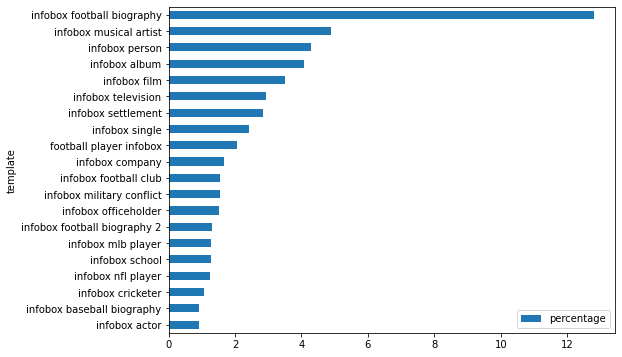

In [34]:
top20_template_types.sort_values('count', ascending=True).plot.barh(x='template', y='percentage', figsize=(8,6))
plt.show()

In [ ]:
top20_template_types_list = top20_template_types['template'].tolist()

In [45]:
top20_template_types_list

['infobox football biography',
 'infobox musical artist',
 'infobox person',
 'infobox album',
 'infobox film',
 'infobox television',
 'infobox settlement',
 'infobox single',
 'football player infobox',
 'infobox company',
 'infobox football club',
 'infobox military conflict',
 'infobox officeholder',
 'infobox football biography 2',
 'infobox mlb player',
 'infobox school',
 'infobox nfl player',
 'infobox cricketer',
 'infobox baseball biography',
 'infobox actor']

In [ ]:
data_popular_temp = data[data['template'].isin(top20_template_types_list)]

In [ ]:
data_popular_temp.to_csv('popular_temps_data.csv')

In [37]:
data_popular_temp.shape[0]*100/data.shape[0]

54.062302189808484

In [48]:
data_popular_temp[data_popular_temp['template']=='infobox football biography']['page_title'].value_counts()

Sergio Agüero        2212
Cyril Northam        2104
Karim Benzema        2083
Peter Crouch         1992
Edin Džeko           1976
                     ... 
Robert Molenaar         1
Dmitry Izvekov          1
Szymon Kapias           1
Paata Jincharadze       1
Paul Ellender           1
Name: page_title, Length: 75579, dtype: int64

## Look at widely used property types

In [7]:
popular_properties = data.groupby(['property_name'])['page_title'].count().reset_index().rename(columns={'page_title':'count'})

In [8]:
popular_properties['percentage'] = popular_properties['count']*100 / popular_properties['count'].sum()

In [9]:
top20_properties = popular_properties.sort_values('count', ascending=False)[:20]

In [42]:
top20_properties

,property_name,count,percentage
12798,image,1540181,4.086186
11326,genre,1187675,3.150968
17303,name,937635,2.487598
19911,pcupdate,850659,2.256846
4140,caption,689170,1.828407
22795,released,550946,1.461691
7118,currentclub,483074,1.281622
3183,birth_place,477089,1.265744
3167,birth_date,469113,1.244583
5137,club-update,444944,1.180461


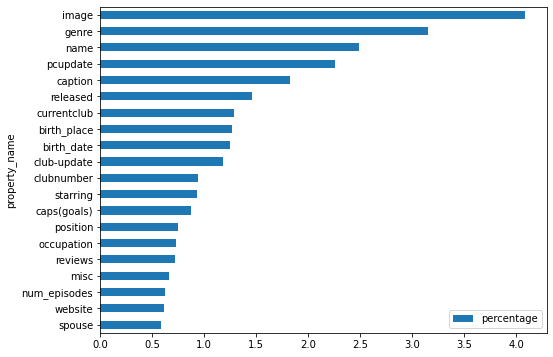

In [10]:
top20_properties.sort_values('count', ascending=True).plot.barh(x='property_name', y='percentage', figsize=(8,6))
plt.show()

In [49]:
top20_properties_list = top20_properties['property_name'].tolist()

In [50]:
data_popular_prop = data[data['property_name'].isin(top20_properties_list)]

In [51]:
data_popular_prop.shape[0]*100/data.shape[0]

27.661026367051402

In [55]:
data_popular_prop[data_popular_prop['property_name']=='club-update']['timestamp'].sort_values()

21019933   2009-04-11 09:49:40+00:00
44666067   2009-04-15 14:43:46+00:00
14005170   2009-04-15 19:42:07+00:00
14005171   2009-04-18 16:33:18+00:00
14005172   2009-04-22 01:48:57+00:00
                      ...           
52748833   2019-09-02 14:36:20+00:00
52753284   2019-09-02 14:36:59+00:00
16019305   2019-09-02 14:38:32+00:00
16054820   2019-09-02 14:38:51+00:00
63038065   2019-09-02 14:39:29+00:00
Name: timestamp, Length: 444944, dtype: datetime64[ns, UTC]



"club-update" means the same as "pcupdate" but only exists from 2009. However "pcupdate still gets updates until the most recent changes in the dataset.

## Label static properties

In [12]:
data

,infobox_key,page_title,property_name,template,previous_value,current_value,timestamp
0,216369130-0,NCSoft,assets,infobox company,"{{increase}} [[US$]] 1,199.9 million <small>(2...",{{increase}} [[US$]] 1.2 billion <small>(2012)...,2013-05-04 10:03:43+00:00
4,216369130-0,NCSoft,assets,infobox company,{{increase}} [[US$]] 1.2 billion <small>(2012)...,{{increase}} [[US$]] 3.78 billion <small>(2017...,2018-08-24 09:13:16+00:00
6,216369130-0,NCSoft,company_logo,infobox company,[[Image:Nclogo leftright.svg|250px|The current...,[[File:Nclogo leftright.svg|250px|The current ...,2013-01-30 22:43:59+00:00
12,216369130-0,NCSoft,company_name,infobox company,NCsoft Corporation<br />㈜엔씨소프트,NCsoft Corporation<br/>㈜엔씨소프트,2010-07-01 22:09:40+00:00
13,216369130-0,NCSoft,company_name,infobox company,NCsoft Corporation<br/>㈜엔씨소프트,NCSOFT Corporation<br/>㈜엔씨소프트,2013-03-28 01:48:22+00:00
...,...,...,...,...,...,...,...
64240405,143131922-0,Latin freestyle,regional_scenes,infobox music genre,"[[New York City]], [[Northern New Jersey]], [[...",{{hlist|[[New York City]]|[[Northern New Jerse...,2016-04-26 21:29:48+00:00
64240406,143131922-0,Latin freestyle,regional_scenes,infobox music genre,{{hlist|[[New York City]]|[[Northern New Jerse...,{{hlist|[[New York City]]|[[Northern New Jerse...,2017-08-21 01:49:48+00:00
64240407,143131922-0,Latin freestyle,regional_scenes,infobox music genre,{{hlist|[[New York City]]|[[Northern New Jerse...,{{hlist|New York City<ref name=Eddys></ref>|Mi...,2018-08-10 19:50:59+00:00
64240408,143131922-0,Latin freestyle,regional_scenes,infobox music genre,{{hlist|New York City<ref name=Eddys></ref>|Mi...,{{hlist|New York City<ref name=Eddys></ref>|Mi...,2018-09-13 22:21:36+00:00


In [9]:
properties_template_pairs = data.groupby(['property_name', 'template']).size().reset_index()

In [10]:
properties_template_pairs = properties_template_pairs.rename(columns={0:'count'})

In [11]:
properties_template_pairs.sort_values('count', ascending=False)

,property_name,template,count
118523,pcupdate,infobox football biography,652390
29999,club-update,infobox football biography,432126
62604,genre,infobox album,373310
40172,currentclub,infobox football biography,356740
62748,genre,infobox musical artist,352174
...,...,...,...
110991,office,infobox indian student,1
43907,death_date,infobox skateboarder,1
140068,seat_change2,infobox election result,1
110990,office,infobox indian politicians,1


In [12]:
property_stats = properties_template_pairs.groupby(['property_name'])['count'].agg(property_mean='mean', property_median='median')

In [13]:
property_stats = property_stats.reset_index()

In [14]:
property_stats

,property_name,property_mean,property_median
0,"""the gypsies""\n founded",4.0,4.0
1,# of seasons,4.0,4.0
2,#_cities_towns,1.0,1.0
3,#_district-type_divs,1.0,1.0
4,#_fuel_elements,1.0,1.0
...,...,...,...
32893,‎\n caption2,1.0,1.0
32894,‎ \n branding,3.0,3.0
32895,‎flag_type,3.0,3.0
32896,—industry,1.0,1.0


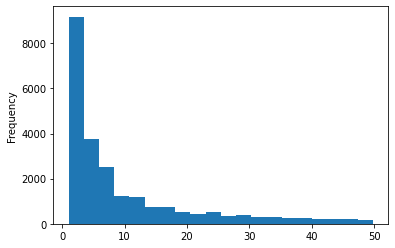

In [77]:
property_stats[property_stats['property_mean']<50]['property_mean'].plot.hist(bins=20)
plt.show()

In [15]:
static_properties = property_stats[property_stats['property_median']<15]

In [16]:
static_properties

,property_name,property_mean,property_median
0,"""the gypsies""\n founded",4.0,4.0
1,# of seasons,4.0,4.0
2,#_cities_towns,1.0,1.0
3,#_district-type_divs,1.0,1.0
4,#_fuel_elements,1.0,1.0
...,...,...,...
32893,‎\n caption2,1.0,1.0
32894,‎ \n branding,3.0,3.0
32895,‎flag_type,3.0,3.0
32896,—industry,1.0,1.0


In [19]:
static_list = static_properties['property_name'].tolist()

Save lists for later filtering

In [21]:
import pickle

In [22]:
with open('static_properties', 'wb') as fp:
    pickle.dump(static_list, fp)

In [17]:
dynamic_properties = property_stats[property_stats['property_median']>=15]

In [18]:
dynamic_properties

,property_name,property_mean,property_median
10,#_servings,31.000,31.0
49,'''show_name''',25.000,25.0
118,1-min winds,455.000,20.0
121,10-min winds,243.875,22.5
131,100s/50s5,166.500,166.5
...,...,...,...
32869,zone_medals,176.750,22.5
32870,zone_medals2,75.000,75.0
32872,zoo_name,127.500,127.5
32873,zords,16.000,16.0


In [20]:
dynamic_list = dynamic_properties['property_name'].tolist()

In [23]:
with open('dynamic_properties', 'wb') as fp:
    pickle.dump(dynamic_list, fp)